## Word2Vec
- 단어를 벡터로 표현하는 기술
- 단어간의 유사도, 거리를 계산할 수 있다
- 단어의 선형 계산이 가능하다


- 남자:왕 = 여자: ?
- 의미자체를 벡터화하는 분산표현 방식
- 단어 의미 자체를 벡터화하면 단어사이의 유사도 측정이 가능! 연산을 통해 추론!
- 한단어를 주변단어를 이용하여 벡터로 표현하기 때문에 사전적으로 정의되지 않는 단어도 표현가능

- 단어하나가 주어지면 그 단어와 주변단어가 일어날 확률을 같이 구함!




- **Skip-Gram**
- 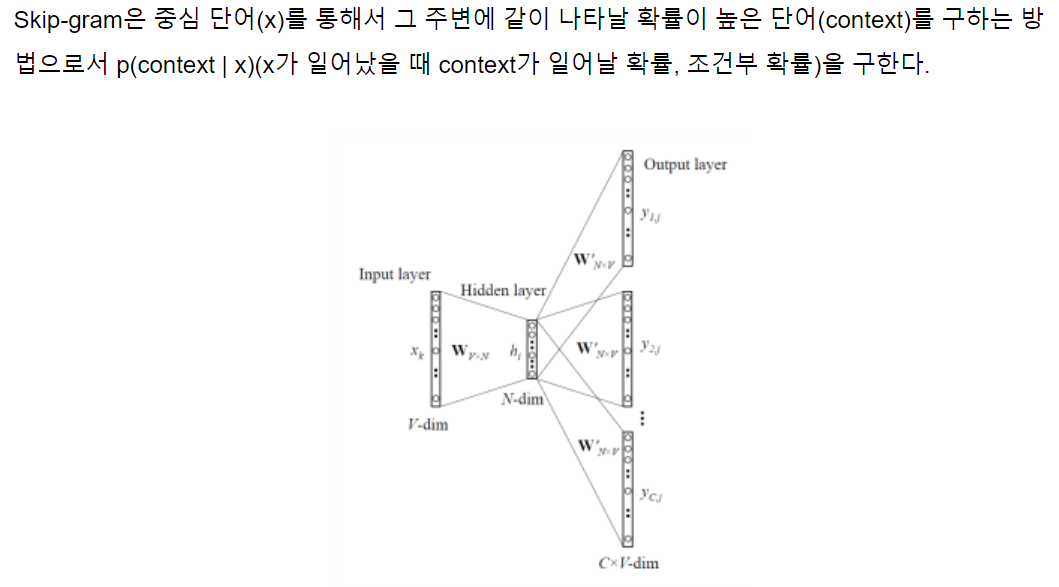

- **CBOW**
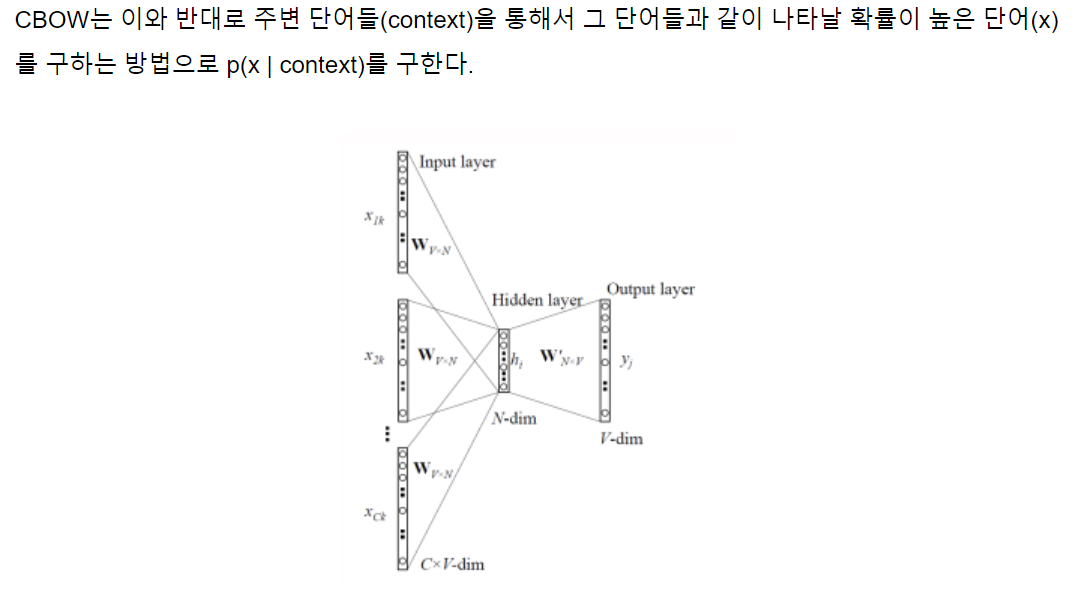


### Gensim 라이브러리 사용

In [1]:
!pip install gensim

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
    100% |████████████████████████████████| 23.6MB 758kB/s ta 0:00:011
    100% |████████████████████████████████| 1.4MB 2.2MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 5.2MB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 2.3MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/62/00/ee1d7de624db8ba7090d1226aebefab96a2c71cd5cfa7629d6ad3f61b79e/urllib3-1.24.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 552kB 2.6MB/s ta 0:00:011
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /home/kjchar/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file

In [1]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

In [2]:
# 토지 파일 열기 https://ithub.korean.go.kr/user/main.do
fp = codecs.open("data/BEXX0004.txt", "r", encoding="utf-8")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()

In [3]:
twitter = Twitter()
results = []
lines = text.split("\n")
for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)
            
wakati_file = "data/toji"
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
data = word2vec.LineSentence(wakati_file)

model = word2vec.Word2Vec(data, size=100, window=10, hs=1, min_count=2, sg=1)
model.save('toji.model')
print("OK")


제 1 편 만세 萬歲 이후
1 장 끈 떨어지다 연
종로 거리 허둥지둥 걷다 있다 억쇠 점포 문 닫히다 있다 것 새삼 깨닫다
참말 가게 문 다 닫다 구마
어젯밤 여관 들다 얘기 생각나다 1030 호 서울 1030 호 상점 일제 히 문 닫다 얘기 이다 갑자기 맥 빠지다 억쇠 어디 향 하다 자신 가다 있다 가야 하다 알 수 없다 것 새삼 깨 달다
괴 나리 봇짐 엉덩이 붙이다 하다 손 들다 우두커니 길 건너편 바라보다 건너편 길 상현 걷다 있다 하다 것 반백 되다 맨 상투 집 나오다 지다 오래 무명 바지 저고리 땟국 흐르다 울상 되다 얼굴 걸레 지저분하다 전차 땡땡 종 울리다 지나가다 지난 삼월 경전 京電 종업원 파업 하다 전차 운행 중지 되어다 그 무렵 서울 상가 하다 달 넘다 동맹 철시 同盟撤市 를 하다 지금 시월 또다시 서울 상가 동맹 철시 하다 것
맘 들 합치다 돈 무서븐 장사꾼 돈 마다 장시 안 하다 …… 돈 나라 있다 겄 그거 겄 데 그렇다 저러다 독립 되다 몰르다 그 러크 름 생목 심 날아가다 조선 천지 들다 일어나다 왜 놓다 새끼 들 어디 끄다 떡 하다 말 이제
억쇠 휘적휘적 걷기 시작 하다 아직 날씨 쌀쌀 하다 하다 수 없다 억쇠 왠지 한기 들다 배다 고프다 국밥 하다 그릇 사 먹다 만 곳 눈 띄다 않다 먹다 싶다 생각 별로 없다
믿다 수가 없다 이자 누가 머 캐 믿다 수 없다 말 처음 사 만세 부르믄 독립 되다 줄 알다 제 그 러크 름 말 들 하니 흥 떡 줄 사람 꿈 안 꾸다 김칫국 말다 겍 되다 기이 머 있다 하낫 되다 기이 없다 말 우리 댁 낫다 리만 해도 안 그렇다 이십 년 넘기다 기다리다 아 무 소앵 없다 군사 이끌다 치다 들어오다 크다 사람 얼굴 가물치 콧구멍 아니다 함흥차사 함흥차사 되다 않다 일이 믄 진작 말 일이 제 식솔 들 생 고생 시키다 좌우 당간 충신 되다 역적 되다 군사 몰다 와 쌈 하다 무신 결판 나다 만판 만세 불다 봐 소앵 있다 목 터지다 제 목 터지다 모가지 날 안 가다 그거 두다 개죽음 하다 기르다 나겉 무식 놓다 군

음 그렇다 소리 하다 줄 알다
알다 왜 물다 누
그게 내 취미 거들다
갈색 흰색 얽섞 홈스 펀 코트 깃 세우다 윤경 오래간만 찾아오다 고향 아무렇다 감회 없이 바라보다
열등감 빚 취미
상현 씹다 뱉다 말 하다
그건 이상현 특유 오해
말 재간 농 하다 것 전 윤경 취미 중 하나라
두 사람 천천히 걷기 시작 하다
매도 자꾸 맞다 버릇 하다 덜 아프다 실연 여러 번 하다 덜 괴롭다 좋다 일도 마찬가지 재미 덜다 법 자네 그 사치 스럽다 자의식 것 여러 번 조롱 당하다 그러니까 자네 말 하다 내 취미 열등감 빚 어진 게 아니다 박애 주의 비롯 되다 거 그 얘기
동문서답 같다 내 용이 군
시시 소리 별로 듣다 싶다 않다 듯 상현 걸다 시선 멀리 던지다 전 윤경 상현 시선 쪽 바라보다
해 지다
……
일찍 들어가다 멋쩍 어떻다 술 하다 가다
그거 좋다
상현 음성 생기 솟다
흥 술 아니다 바로 생명수 구먼 술 좀 안 먹이다 끌 오다 우거지상 차마 볼 수가 있다
윤경 자신 제안 하다 화가 난 듯 혀 찬
전라도 갑부 아들 전 윤경 상현 일본 유학 당시 사귀다 친구 상현 두 살 위 서른 하나 진작 동경 건너가다 별로 신 통치 못 전문학교 전전 하다 마지막 중퇴 하다 론 일본 대학 문학 대한 조예 깊다 특히 영국 오스카 와일드 경도 되다 때 있다 그러나 글 쓸다 생각 없다 듯 그러나 상현 문학 해보다 자주 권유 하다 서울 임명 빈 상현 동인지 同人誌 비슷하다 얄팍 잡지 서너 호 내다 적 물심 양면 도와주다 사람 전 윤경 이다 그 다분히 자유 분방 하다 소위 댄디스트 하다 수 있다 인물 여자도 많이 사귀다 편이 무절제 하진 않다 향리 있다 가족 관례 아들 남편 아버지 로서 의무 충실 히 하다 이번 3 1 운동 때 참가 하다 다른 또래 열광 적 이진 않다 또 그 책상 치 일본 제국주의 규탄 하다 독립 쟁취 하다 하다 토론 벌어지다 때 늘 침묵 지키다 그러나 아 무도 그 친일파 지목 하다 않다
두 사람 으슥 골목 들어서다 박모 薄暮 의 어스름 아직 감다 기생 집 처마 밑 전등 켜다 있다

하다 미워하다
만판 그렇다 봐 소용없다 자식 낳다 젯상 들다 크다 누리 젤 이제
쳇
밉다 말 쳇 멋꼬 말다 그 제집 따다 문 술 가게 차맀 하다 마는 이렇다 가게 안 해도 굶다 않다 우리 가만히 앉다 자석 버 것 얻다 묵고 있다 것 아니겄 농사 어서 내 감시 살다 와 서울 네 지다 살다 하노 말 애비 밉다 계집 자석 있다 놈 그렇다 천리 있다 집 못 오 니 얼굴 볼라 카믄 우리 여기 오다 하나 부모 니 보다 오다 치자 그런데 니 가숙 무신 죄 오지 못 손 뭉 개 도록 일만 하다 하다
두 만 네 목 메다 말 끊다 소매 속 손수건 꺼내다 눈물 닦다
내사 마 애 연하다 불쌍하다 …… 너 거들다 붙다 앉다 있다 꼴 보다 눈 불 난 사나 아가 잘나믄 열 기 집도 거나 린다 크다 그 아아 젊다 젊다 것 찾아가다 친정 있다 말갛다
흐느껴 운 두 만이 조금 안 되다 생각 들다 어세 누 그렇다 뜨다 리
누가 놀믄 안 갑 가게 비우다 수가 있다 지다 하로나가믄 장사 엉망
빈말 아니다 심부름 꾼 둘 있다 술 도매 상 이기 때문 그 들 온종일 술 날 하다 외상 거래 많다 장부 정리 상당하다 복잡하다 수지 상 收支上 의 금액 많다 남 맡기다 수 없다 것 사실 두 만 아비 모자간 다툼 끼어들다 않다 종시 침묵 지키다 서다 있다
그만두다 피차 간 다 살 볼라 꼬 하다 짓 아 입 그런데 오늘 어디 가다 옷 차리다 입다 나오다
머 제술 장갯날 내일 부지 갖다 간다
처음 두 만 아비 입 떼다
영 팔이 제 둘째 말입
음
두 눈살 찌푸리다 아주 마땅 찮아다 표정
아부지 머 그리다 챙기다 싸다 것 있다 서로 살기 바쁘다 세상 부짓돈 아깝다 바서 하다 말 아 이다 다 지목 들 받다 있다 사람 들 귀찮다 일이 생기 믄 우 짜다 듣다 그 집 아들 둘 잡히다 가다 나오다 믄 서요
그래서
지다 사업 지장 있이믄 하다 하다 말 아니다 술 도매 란 아 무 하다 거 아니다 줄 뻔하다 아시믄 그렇다 그 사람 들 눈 나다 허가 취소 하므다 그 만인 기르다
니 누 덕분 이리 되다 거인 알 기다 아
이번 부자간 시비


미치다 놈 들 장가 가믄 대수 그따위 호박꽃 같다 것 들 갈라고 하다 열 번은 더 가다
하다 낯짝 보고 목 매다 가시 나야 많겄지마
하다 말 끊다 버리다
그렇다 근태 홍 날카롭다 쳐다보다
그 다음 말 뭐
그 그렇다
많겄지마 다음 말 해보다 겁 먹다
너거 어 무니 별난
딸 줄 사람 없다 게다 그 말갛다
……
내 생각 너 생각 하다 같다 하하 핫 ……
엉뚱하다 홍 이 신 나서다 웃어젖힌
미치다 머 그리다 울다
힐끗힐끗 쳐다보다 근태 낭패 표정 짓다
씨 어미 되다 사람 별난 줄 아 서방 되다 놈 안 그렇다 내 피 반 그 지독 몸 쓰다 치다 …… 그렇다 그렇다 하하 핫 …… 나 말 근태 돈 대신 세상 있다 여자 란 이다 다 잡아먹다 싶다
미치다 지랄 겉 소리 하다
곰곰 이 생각 하다 나다 그렇다 그렇다 놈 아니다 싶다 말 내 아버지 같다 사람 되다 기다 썩 글렀거 그렇게 살 바 당장 이 자리 콱 죽다 버리다 기르다
너거 아부지 우떤 사램 인 자다 모르다 겄 다마 니 차다 변하다 많이 변하다 처음 오다 때 해도 독립군 우떻 만주 벌판 가다 돈 버느 해 싸다 더 마는 와 그리다 돼다
지금 생각 같다 만주 일본 갈다 싶다
일본
왜 못 갈다 성 싶다
가다 머 하다 것꼬
가보다 알
공연 신소리 말 조선 사람 일본 가보다 곡갱 이질 하다 기이 없다 카더라 니 어 무니 돈 내다 공부 시키다 준 믄 몰르다
이 놈 자식 간 떨어지다 니 그렇다 소리 하다 최부 자 댁 태어나다 것 같다 기분 들다
참말 이제 니 달라지다 거 감당 못하겄 술잔 믹 우리 죄인 모르다 겄 다마 질정 없다 소리 자꾸 하므다 정선 생 대하다 면목 없어지다 말
그 물 지게꾼 말갛다
홍 이 픽 웃다
얼 우리 덮다 두다 일 니 끄다 뒤지다 이 빌다 어묵 놈
물 지게꾼 하다 하다 거지 머
그까짓 시시 소리 이 눔 우 자석 들 와 이리 더딘 모르겄
담벼락 발목 잡히다 기지
그렇다 믄 야단
네 이노 움 이 대적 놈 내 집 구석 망 해묵 놈 빌어 묵다 타곳 가다 빌어 묵다 캤 와 집안 것 들다 내 노오
홍 까맣다 구 하다 흉

홍 이 뒤안 뛰어가다 뒷간 소피 보고 난 뒤 판자 울타리 옹이 빠지다 구멍 눈 가져가다 울타리 뒤 개천 개천 건너 좁다 길이 있다 좁다 길 켜다 그저 고만고만하다 초가 집들이 있다 판자 울타리 초가 아랫 부분 가리다 있다 것 그 중 낡다 판자 울타리 장이 집 장 이의 늙다 아비 구들 자다 놓다 소문 난 염 서방 그리고 오라비 둘 있다 하나 교회당 일 보다 작다 오라비 두 만 술 도매 상 술 배달 하다 일꾼 이럭저럭 살기 괜찮다 펴다 재작년 어미 죽다 뒤 오라비 모두 미장 여서 장 이 살림 맡다 하다 밤 교회 경영 하다 야학 다니다
나오다
판 자문 밀고 물동이 들다 장이 나오다 이맘때 쯤 이 그 항상 물 길르다 나오다 것 부리나케 홍 이 집 나선 우물 다리 건너 이켠 있다 빨리 가다 다릿목 서다 있다 장 만날 수 있다 홍 이 요즘 몇 번인 다릿목 가다 장 기다리다 서다 있다 하다 우연 것 말 아직 걸다 보지 않다 빨다 쳐다보다 장 이 홍당무 되어다 달아나다 것 이다
장 이 급하다 걸어오다 하다 손 물동이 들다 하다 손 똬리 들다 급하다 걸어오다 오다 홍 보고 주춤 하다 마음 고치다 먹다 다시 걷다 역시 얼굴 홍당무 홍 옆 스치다 달아나다 하다
이 봐
멈추다 선 장이 검정 저고리 앞섶 올라가다 내려가다 하다
너 오늘 야학 끝나다 맨 나중 나오다 알다
아 무말 없이 계집아이 달아나다
네 안 그 배다 어디 두다 보다
바 짓다 손 찌르다 하다 다리 들다 빙그르르 돌다 홍 이 웃다 그리고 달아나다 장이 뒷모습 바라보다 짧다 치마 하얗다 버선 목 사이 종아리 보이다 듯 말 듯
홍 집 앞 오다 때 나오다 관수 마주치다
어디 가다 덥다
예 저기 좀
홍
야
니 나하 얘기 좀 하다 라나
그렇다
그날 밤 삼석 만난 일 땜 그렇다 홍 이 생각 하다
걸음 얘기 하다
예
일전 석 만나다 걱정 하다
왜
음성 튀다
그 정도 얘기 하므다 니 알 만 하다 기 그러나
모르다
반항 적
니 와 그리다 돼다 모르겄 하다
지다 어떻다 돼다 그렇다
술 말다 담배 피고 못 되다 놈들캉 어울리다 댕기믄 그렇

아이구 좋다 얼씨구 좋다 좋다 저기 왜 눔우 새끼 물르다 간다 나막신 벗다 달아나다
덩실 덩실 춤 추다 상상 하다 수 없다 호 방한 웃음 웃다 젖다 데 강쇠 어안 벙벙할 수 없다 정녕 그 꼴 미치다 사람 볼 수 없다 그러나 군중 들 박수 성원 보내다 물 밀다 밀리다 극도 흥분 되다 군중 들 어떻다 여유 주다 결과 되다 것 말 하다 왜 흉내 내다 물구나무 듯 뒹굴 고 솟다 치다 오르다 하다 짝쇠 지랄 훌륭하다 선도 역할 이다 것
저눔 간이 디 비다
뒤늦다 깨달 강쇠 그러나 군중 밀리다 짝쇠 접근 하다 수 없다
저 저 미치다 놈 보 저눔 누구 잡다 묵다 저러다
전반 적 그러하다 특히 산간 벽촌 작다 고을 사전 면밀 계획 따르다 조직 적 만세 시위 벌어지다 경우 사람 모이다 가령 장날 장터 같다 데 선도 자 先導者 없이 터지다 경우 많다 그렇다 경우 조금 불 지르다 폭력 번지 율 높다 아무튼 어떻다 경우 것 지리산 중심 하다 은거 있다 동학 잔당 그러니까 운봉 양재 곤 노인 세상 뜨다 윤도집 김환 영도 하다 동학 골수 파 들 왕시 의병 그늘 밑 활약 하다 그 방법 그대로 답습 하다 표면 나타나다 않다 말 하다 열 오르다 데 올라가다 때 그 군중심리 교묘 히 조종 하다 폭동 이끌다 가다 것 그러니까 계기 만들다 주다 슬쩍 뒷전 물르다 버리다 그것 세력 확장 꾀 하다 그 들 로서 어쩌다 수 없다 고육책 그렇다 만큼 자기 사람 들 단 하다 사람 희생 시키다 수 없다 것 철칙 이다 사실 불 지르다 사람 하다 곳 하다 사람 이면 족 하다 선두 서서 핏대 세우다 위험 저지르다 않다 하다 사람 희생 내지 않다 수 있다 이다 짝쇠 걸리다 들다 것 만일 경찰서 우둔 짝쇠 어떻다 단서 주다 되다 짝쇠 처지 선 알다 범위 아주 좁다 그것 명확하다 알다 것 아니다 하다 간악 왜경 어떻다 포착 되다 불안 위협 느끼다 것 당연하다 이다
아이구 좋다 얼씨구 좋다 왜 눔우 새끼 물르다 간다 이 자석 한 분 더 그렇다 보제 춤 벌름벌름 춤 시로 그라믄 이분 끄다 막 소보 더 좋다 델 갈다 기다


한복 얼굴 번쩍 치 켜다 눈 눈 강하다 부딪는
그 그라믄 어디 살 있다 기 그 말입
……
몹쓸 짓 하므다 살 있다 구마
불 덴 것 같다 아이 울다 소리 관수 얼굴 무심 상 상태 돌아가다 한복 이 구원 청 아이 얼른 안다 올린다 오륙 개월 쯤 되다 것 같다 아이 울음 그치다 낯선 관수 보다 다시 입 크게 벌리다 아비 귀 꼭 잡다 있다 대로 소리 지다 대다
응 응 아 알다 배 고프다 그 말 이제 어 매가 곧 오다 거 니 젖 주로 오다 기르다 카이
울컥울컥 치 밉다 감정 누르다 달래다 아이 잃다 하다 때 무심 상 하다 조금 전 해도 냉혹 하다 관수 얼굴 처음 연민 빛 서린 울다 아이 어르 아비 모습 그 풍경 왠지 그 마지막 삶 보루 느껴지다 것 이다 달구지 타고 오다 소년 이다 노숙 길 풀 모기 쏘다 얼굴 탈 바가지 되어다 소년 이다 각박 인심 천대 속 억새 풀 자르다 소년 사람 하다 가지 설움 다 있다 하지만 또 누가 누가 서럽 하다 들다 마을 한복 이 기막히다 소년 기르다 보내다 사람 없다 것
허허 어 좀 참다 캐 이르다 배고프다 거사 좀 참으믄 되다 로 롤롤 …… 아쿠
관수 입맛 다시 외면 하다 이 때 울타리 없다 마당 들어서다 아낙 아이 울다 소리 듣다 손 들다 호미 던지다 그리고 바쁘다 젖 문 지르다
울 애기야 배다 프제 내 오다 미가 오다
허둥지둥 마루 오르다 연신 불 젖 비비다 대다
허다 차다 이 놈 아아 전 없이 와 이르다 제 학 떼겄 롤롤 각쿵
한복 말 새 나오다
밉다 조금 더 조금 더 하다 보다 그만
수수 하다 생기다 아낙 남편 사과 하다 방문 연
아이구 손님 오싰 가배
제수 씨 나다
아이고 저기
인사 나중 하다 아아 젖 물리 소 그라믄 우리 저 방 가지
관 수가 일어서다
아 아 이다 아아 안고 지다 가다 겄 십 다
아낙 무슨 대단하다 벼슬 아치 좌 정 하다 듯 황송 하다
한복 이 스무 살 혼인 하다 서서 방이 중매 들다 셈 실 장바닥 계집애 하나 줍다 온 것 제 정신 아니다 서서 방이 걸식 하다 얻다 밥 나누다 주기도 하다 그러니까 계집아이 거지

한숨 내쉬다 언년이 조준 구 보다 처 홍씨 곁 도망치다 나오다 것 작년 섣달 그믐 가까워지다 때 마침 서울 와 있다 석 만난 언년 시골 데리다 달라 애원 하다 바람 내려오다 길 동행 하다 석 이 하동 데리다 홍씨 말 없이 와 버리다 도망 도망 셈 어리다 때 아비 품 빼앗다 홍씨 데려가다 딸 처음 몇 해 딸 보고 싶다 실 성하 다시피 마을 쏘다 육손 이다 그러나 세월 너무 기다 이다 무질서 속 방치 되다 잡풀 같다 생활 탓 이다 의지 박약 천치 가깝다 사람 변하다 육손 딸 남 보다 맞이 하다 별다르다 감동 느끼다 못 하다 듯 그렇게 보이다 언년 역시 추억 속 아비 아니다 뿐 아니다 고통스럽다 서울 몸 배다 버리다 여러 가지 습관 때문 생활 아비 모두 밀착 되다 않다 이화 감 異化感 은 묘 하다 발전 하다 오히려 그렇다 하다 이 집 살다 독특하다 인원 人員 의 하다 사람 되어다 가다 모르다 상전이 하다 수도 없다 한 식구 하다 어렵다 조준 구의 며느리 두 아이 들 그리고 주변 시중 들다 것 아니다 안 들다 것 아니다 공동 생활 그렇다 때문 언년 동화 되다 수 없다 동화 되어다 가다 하다 나무 떨어지다 뒷산 가다 한참 긁다 그것 귀찮다 쓰러지다 울타리 뜯다 밥 지다 되다 집 문전 있다 비옥 밭 옛날 계집 종 하인 들 집안 소용 되다 채소 잡곡 등 심다 먹다 그 밭 들 남 주어 그 대가 들어오다 채소 잡곡 등 연명 하다 생활 쌀 있다 쌀밥 먹다 보리 있다 보리밥 먹다 심지어 콩 산다 삶다 먹다 볶다 먹다 이러하다 생활 시초 이다 모르다 꼽추 도령 병 수가 장가 그때 그때 쌀밥 이 장작 고기 반찬 이다 테 울면 밥 먹다 하다 병수 이다 또 그것 보아 하다 사람 들 일종 희다 생물 바치다 병 수의 아내 되다 사람 경우 덥다 아무튼 삶 대한 무 의지 공통 되다 질병 이 집 살다 사람 들 스 들다 뿌리 내리다 것 시초 상전 되다 기르다 거부 해오다 먹다 것 거부 해오다 살다 것 거부 해오다 병수 그러나 상전 하다 자신 저 주하 서도 밥 먹다 죽지 못 하다 먹다 말다 살다 일

조준 구 끊임없다 주 절대 데 최서희 창밖 내다보다 앉다 있다 것 이윽고 유모 나타나다 그 푸른 보자기 서희 건네다 조준 구의 눈 충혈 되다 보자기 지켜보다 보자기 속 백 원 짜다 리 묶다 지폐 다발 나타나다 조준 구 양복 속 주머니 속 집문서 인감 꺼내다 그리고 매도 계약서 작성 되어다 인장 찍다 집문서 계약서 서안 놓다 순간 조준 구 얼굴 초조하다 불안하다 빛 서린
유모 반 갈라 주다
서희 지폐 다발 내미다 그 순간 조준 구 얼굴 후회 하다 빛 지나가다 나 다 빼앗기다 저 돈 만 원 쯤 가지다 만 원 쯤 있다 무슨 일 시작 하다 수 있다 모르다 …… 후회 아쉽다 표정 그냥 조준 구 얼굴 머물다 있다 오천 원 지폐 서류 옆 놓이다 조준 구의 얼굴 다시 변화 인 과연 저 오천 원 내다 오다 것 무슨 수로 그 집 오천 원 판단 말 저 돈 과연 내 품 들어오다
이보 시오
으 음
조준 구 움찔 하다
내 이 것 거기 끝 난 셈 이오 마지막 인간 적 동정 베 풀다
고 고맙다
조준 구 두렵다 사태 예감 하다
본의 아니다 선택 자유 드리다 일말 양심 가져가다 돈 오천 원 가져가다 둘 중 하나 택하다
조준 구 손수건 꺼내다 이마 문 지르다
내 내 형편 말 아니다 앞서다 말 하다 죽다 사람 살리다 셈
마음대로 하다 수 있다
그 그야
마음대로 하다
조준 구 서희 쳐다보다
마 만석꾼 인척 유리 걸식 하다 자네 체면 체면 뭐 되다
……
어 어쩌다 수 없다
조준 구 얼굴 땀 또 닦다 지폐 손 가면 사방 사람 들 쫓다 자신 결박 하다 것 같다 생각 들다 눈앞 돈 보고 손 뻗다 칠 수 없다 상체 앞 기울다 팔 천근 같다 들다 올리다 수가 없다 전신 누르다 중량 들어오다 려 하다 조준 구 드디어 팔 뻗다 지폐 집다 들다 서희 얼굴 회심 미소 떠오르다 미소 크게 확대 되다 가다 하얗다 이빨 드러나다 흔들리다 웃음 소리 일정하다 굴곡 이루다 톱날 조준 구 마음 썰다 대다 무슨 일이 일어나다 것
나 나 그러면 가다 가다
조준 구 허둥지둥 뒤통수 그 날카롭다 톱날 같다 웃음 소리 들다 대문 나서

볼 만했겄
그 이삔 갈다 엎어뜨리놓 장정 들 번갈아 올라타다 이다 이 놈 소가 와 안 가노 함 시로 엉덩이 철벅 철벅 때리다 기르다 뿐이겄소 목 새끼 줄 걸다 네 발 기 하다 구경꾼 앞 돌다 댕기 데 그 미가 소개 기르다 가져오다 게 우 풀리다 나다 좀 안 되다 생각 들다
안 되다 기다 머 안 돼다 말 이 백정은 사람 아니다 그 놈 들 오다 하다 내버리다 두다 칼 들다 소만 잡겄소 사람 잡다 들다 기 옴짝 달싹 못 하다 콱 기르다 직 놓다
사람 들 백정 얘기 흥 돋다 술 말다 주점 나가다 새 손님 들어오다 하다
11 장 백정은 예수 믿다 수 없다
여한 餘恨 과 미진 未盡 울분 풀 길 없다 밤 이다 관 수나 석 이 그렇다 서희 후련 밤 이다 여한 마찬가지 이제 서희 무었 지탱 하다 것 조준 구가 걸어오다 않다 이상 보복 끝나다 셈 간도 땅 이르다 갈다 맹세 보복 사실 이렇다 것 아니다 더 가혹 더 잔인 보다 더 철저하다 것 이다 것 관 수나 석 이의 경우 마찬가지 이다 그 살찐 암탉 같다 젊다 날 조준 구 여전하다 살찐 암탉 늙다 닭 되어다 버리다 조준 구의 모가지 비 틀다 끝나다 원한 이렇게 싱겁다 끝나다 것 끝나다 것 생각 하다 것 관수 석 이 나란히 밤길 걸어가다 행랑 이 들 저녁 얻어먹다 어두워지다 뒤 최 참판 댁 나서다 것 연학 이 실소 가면 소상 하다 설명 하다 않다 조준 구의 비천 교활 탐욕 스럽다 또 한순간 여유 있다 수전노 거의 없다 가다 한 허영 자락 걸치다 그 거동 충분하다 상상 하다 수 있다 밤바람 말다 묵묵 히 걸어가다 두 사내 이 들 끝나다 보복 생각 하다 것 십분 보복 끝나다 때문 아니다 서희 경우 제 치다 정확하다 말 하다 이 들 보복 포기 하다 것 어느 하늘 밑 살 무엇 하건 잊어버리다 하다 그렇다 않다 일 하다 수가 없다 것
형님
와
밤 기차 타고 서울역 내리다 그렇다 기분 이다 막막 어디 가야 하다 모르다 그 기분 말 이다
울음 참다 음성
살다 기이 그렇다 거 아니겄
살다 게 그렇다 요
……
자신 없다 울분 치 밉다 그렇다 수가

나 독립운동가 아내 아니다 친일파 최서희 내다 아직 친일파 필요하다 그러나 그 사람 내 자식 아비 내 남편
서희 얼굴 핏기 돈 이성 달래 볼 수 없다 분노 치민 십 년 전 이동진 군자금 요청 하다 때 거절 하다 일이 생각나다 기본 적 그때 생각 오늘 생각 별 변화 없다 다만 다르다 그땐 냉정 하다 지금 감정 앞서다 차이점 그리고 또 그때 이성은 편협 지금 감정 포 용의 폭 넓어지다 것 사실 여기 서희 생각 중단 되다 유모 문밖 와 부르다 있다
왜 그렇다
혜관 스님 오다
……
마님 뵙다 하다
……
어찌 하리 끄다
사랑 모시다
예
서희 피곤하다 잠시 두 손 얼굴 가리다 떼다 피곤 더불다 갑자기 뭐 모르다 일 들 태산 몰려오다 것 느끼다 희미 하다 맥박 치기 시작 하다 것 서희 몸 일 무게 실리다 시작 하다 차츰 맥박 정상 돌아오다 것 지각 희미 안개 혼란 꺼풀 벗다 정확하다 지도 일목요연 하다 처리 하다 하다 일 들 자신 위치 자신 소속 되어다 있다 모든 것 머릿속 펼쳐지다 어떠하다 정열 이미 아니다 그것 너무나 뚜렷하 그리고 훈련 되어다 온 지각 습벽 근래 와 서다 어떻다 타성 하다 수도 있다 앞 더욱 빈번 하다 서희 절망 빠지다 것 회의 늪 속 헤매다 것 바 스럽다 듯 감성 메다 갈다 것 때론 극도 예민 때론 극도 두다 감 해지 불균형 예상 하다 수 있다 일이 그러나 그 구축 해오다 가치관 의 하다 판단 여전하다 선명하다 것 설령 훈련 되어다 온 지각 습벽 되다 인식 과거 그 집념 공고 하다 상태 풀다 타성 옮기다 하다 태엽 풀어지다 벽 시계 시계 방울 진통 둔화 되다 급기야 정지 하다 상태 결코 가지 않다 것 수천 권 서다 책 얻다 지식 심지어 서희 자신 사유 思惟 침범 하다 수 없다 이 같다 고정관념 서희 하다 여자 특이하다 성질 도 볼 수 있다 그러나 그것 기다 역사 이조 오백 년 동안 구축 놓다 바인 班家 의 독선 빚 뿌리 깊다 정신 구조 하다 수 있다 것 같다 어느 날 홀 연하다 깨달음 얻다 중생 그 인생관 바꾸다 삶 규범 바꾸다 그러나 서희 늘 깨닫

서다 일부러 부어 터지다 시늉 하다
불쌍하다 씨 엄씨 있다 세상 며 누리 감싸다 씨어 무니 그리다 흔하다 줄
내 그걸 안 싸주믄 누가
백지 죄 없다 나 보고 성 내다 머 영 매 맞다 집 와 계집 친 카더 마는
슬슬 부아 질 하다
저 놈 말 버르장머리 며 누리 보고 손자 보더 말짱 사람 배맀구
두 만 네 웃다 버리다 서다 실 마디 만들다 실 물어 끊다
엄니 나다 착하다 씨어 무니 뽄 좀 봐 오늘 올케 호강 좀 시키다 줄라
호강 시키다
야
호강
오늘 기성 하다 장 가다 옷 하다 불 끊다 또오
또오
딸 눈치 힐끗 살피다
기성 애비 보고 구겡 좀 시키다 돌라 카
머라꼬
금세 난처 해지 얼굴 서다 곁눈질 어미 기색 훔치다 보다 웃음 참다
서울 집 가다 저녁 한 상 자알 차리다 호령 하다
그 그거
와 그라믄 안 돼다
그거
말짱 알 보다 엄니 이불 밑 활갯짓 이 구마 입 며 누리 며 누리 해 싸다 속 아들 생각 더 하다 배
생각 하다 아니다
그라믄
……
가만히 보다 두 만이만 나쁘다 기이 아니다 어무 아부지 자다
야 머 카노
기성 가다 없다 하다 말 이요 개도 물다 개 돌아보다 서울 네 가다 더러 찍짝 붙다
서다 또 곁눈질 하다 두 만 네 쓸다 것 깨물다 얼굴
아 그렇다 씨 본집 당당하다 와 못 하다 기요 그렇다 며 누리 따다 문 간이 아프믄 충동질 하다
듣기 싫다
안 그렇다 끄다 아이 적 와 그 강청댁 말 이다 아이 못 낳다 주제 밤낮없이 쫓다 댕기 믄 부수 퍼붓 하다 무당 집 월 서다 하다 수 없이 달아나다 부리 않다 끄다
두 만 눈 겁 더럭 실리다
니 올케 내 충동질 하다 캐 그렇다 성미 아니다 그렇다 되믄 만사 끝장 나 기지 머
멀다 멀다 해 싸다 그래도 팔 안 굽다 안 캅
쯔쯔쯧 니 나이 들다 어멍 늘다
아무리 좋다 해 싸다 시집살이 다른 데 있겄소 몇 해 살 보믄 자연 고로 어멍 늘 요
서다 재미 듯 깔깔 웃다
실 말 이다 실 최 참판 댁 가야 하다
거 기다 머할라꼬
두 만 네 깜짝 놀란
친정 간다 하다 더 마는 작다 집의 동세 옷 가지 오다 더마 신랑 봄옷 캄

야 한 분 가기 가다
떨떠름해한
가기 가다 안 좋다 하다 가배
장사 하니 바쁘다 모 앵 이다
알 만 하다
기성 네 얼굴 숙이다
그래서 우리 친정 엄니 성 내다 야단 나다
와
엄니 아 제 최 참판 댁 일 보다 거 까맣다 겉 모리 기싰든 배 사돈 간 그렇다 수가 있다
이 거 차다 듣다 보다 찾아가다 인사 디 리야 하다 거
연학 이 또 머리 긁다 적 긁다 적 긁다
아니다 요 아 제보 설마 성 냈겄소 먼저 와 살믄 찾아가다 보지 않다 기성 애비 성질 안 마땅찮애 그렇다 기르다 독골 기다 아부지 엄니 사 두 만이 말 안 하므다 우 찌 알겄소
바쁘다 보믄 잊어부릴 수도 있다 일이
연학 이 기성 네 옆 있다 때문 애쓰다 얼버 무리다 하다
아 제
야
두 만이 섭섭하다 했다믄 그거 아 제 탓 아니다 마음 끼 마소 두 만이 옛날 생각 하다 최 참판 댁 꺼맀일 기요
남자 들 술 한잔 함께 하므다 그 만이 마음 끼 기다 그 형수
야
자세하다 것 모리 겄 소마 전사 前事 도 있다 기왕 이리 오다 우떻십 이 댁 마님 인사 드리다
그 기이 그렇다 씨 …… 우리 잘못 하다 일이 있다 면대 하다 두렵다 ……
어렵다 생각 하다 거 머 있다
그래도 그렇다 않다 하기는 전사 말 하다 믄 이루 말 하다 수가 없다 제 은혜 많이 입다 어리다 적 애기 씨 업다 드리다 기도 하다 나르다 기억 하다 않겄지마
……
그 인사 디 리더 캐 아부지 엄니 먼저 하다 기이 순서 아니겄소 내 불쑥 나서믄 도리어 노음 안 타겄소
그건 그렇겄소
서다 난처 얼굴 시동생 쳐다보다
차다 날 저 물겄 데 아 제
야
바쁘다
머 바쁘다 것 없다
그라믄 우리 용이 제 집 좀 데리다 주다 믄 싶다
홍 이 아부지 말입
야
그렇다 하다 아니다 아니다 나다 가보다 가보다 함 잘 돼다 함께 가입 시
세 사람 어물 전 조기 몇 마리 사 들 용이 집 향 하다 용이 눕다 있다 않다 마당 햇볕 비치다 곳 지팡이 멍청하다 앉다 있다
아 제
부르다 것 동시 선 눈 눈물 떨어지다 기성 네 선 등뒤 얼굴 내 밀고 옛 모습 찾다 수 없다 용이 바라보다
좀 

생각 하다 보이다 계집 자식 있다 몸 죄인 겄소 와 지다 성 님 앞 기 죽다 합
환 이 킬킬 웃다
그렇다 성 님 내 말 좀 들다 거기 와 산청 말 이다 그 와 이 삐 생기다 과수댁 안 있다 끄다 그만 보쌈 오입 시
여전하다 환 이 킬킬대 웃다
데리 와 보 비위 해 돌라 카 아무리 성 님 장 사기 아프다 데 장사 없다 안 캅디까 그 또 노리 외로 바서 우 찌 살다
외롭다 않다 무슨 재미 사누
억지 소리 마소 하다 말 가다 이 방해 믿다 거 아니다 답 대비 맘 없다 그렇다 말 하다 때 그만 정이 뚝뚝 떨어지다 말 이
맘 없다 말 네 하다 내 하나
아 그렇다 씨 그라믄 하다 가지 묻겄는데 성 님 여자 좋아하다 않다 말 심하다 겄소
계집 본시 좋아하다 편이 너 알다
그러믄 말 이다 마누 늘다 기집 아니다 색시 아니다 그 말 심다
너 마누라 도둑 맞다 겁 나나
겁 안 나 것 아니다 제
흠
술 하다 잔 들이켜다 강쇠 손바닥 입가 훔치다
본시 부텀 성 님 남 기집 훔치다 것 시작 하다
사팔눈 빙글빙글 돌리다 환 얼굴 새 파랗다 변하다 다시 새 빨갛다 변하다 그렇다 강쇠 태연 자약
볼 만 하다 둔갑 하다 백 시 겉소 푸르락 붉으락 아직 피 끓다 가배
맞다 맞다 이 놈
강쇠 머리 위로 오른 편 팔 뻗다 숱 많다 상투 환 거머 잡다 그리고 옆 확 젖힌 목 줄기 옆 꺾다 강쇠 사팔눈 치 뜨다 환 놓다 보다 두 개 눈 따로따로 데 입술 웃음 기 먹음 있다 가관
이 사팔뜨기 죽이다 놈
확 뜨다 민 벽 가다 머리 통 부딪 소리 나다
참말 이제 성 님 장사
술 처 먹다
술잔 내미다 환 이 쓰다 겁 웃다 등잔불 받다 깡 마르다 얼굴 아픔 가시 돋다 것 같다 아직 극복 되다 못 채 지난날 그림자 그 주변 맴 돌다 있다 것 같다 술 받다 말다 다시 술 채우다 내미다 술잔 받다 환 이 엉뚱하다 말 하다
노자 老子 가다 말 하다 가난하다 나라 남아 돌아가다 것 있다 듯 보이다
평정 해진 음성
야
똑똑하다 들다 강쇠 얼굴 바싹 들이다 대다
무슨 뜻 알다
무식 놈 서다 어디 살겄소 공자 맹자 모리 

강쇠 또다시 깃털 세우다 고함 치다
네 놈 버르장머리 내 후일 바로잡다 허다
일 매우 간단하다 머 우떻 간단하다
아 금매 일이 벌어지다 소행 자 있다 것 이 소행 자 있다 달 것 겉으 잡다 와 타살 하다 되다 거 아니다 더 남 허다 말 막다 백날 말다 소용없다 일이 아 금매 그 까다 놈 하나 못 잡다 어디 우리 밤 이슬 맞다 일헌 허다 수 있다 간디
말 억양 하나 걸리다 곳 없다
이 치다 죽이다 놈 뻔 뻔하다
강쇠 지다 삼만 앞가슴 비 틀다 쥐다
한 덩어리 얽혀 뒹구는데 일어서다 말리다 사람 아 무도 없다 남원 박달 하다 손 땅 짚다 움직이다 듯 자세 취하다 석포 눈길 밀리다 그렇다 자세 지속 채 저력 숨다 밋밋 푸르스름 얼굴 복잡하다 뿐 누구 하다 사람 일어서다 하다 패싸움 벌어지다 것 뻔하다 일 패싸움 벌어지다 하다 해결 되다 성질 사태 아니다 것 이 들 잘 알다 있다 피차 다 붕괴 되다 위기 모면 자 안간힘 쓰다 것 사실 어쩌면 육박전 벌이 있다 두 사내 그것 생각 하다 있다 모르다 전후 사정 미루다 보아 대충 짐작 간 조막손 손 가도 침묵 지키다 있다 얼굴 침통 하다
나 이자 물러나다 처지 아니다 모리겄 내 생각 아무리 달음박질 치다 일 저만큼 터지다 흥 석포 말 탕숫국 묵 나이 가깝다 갑
힘 견준다 자타 공인 하다 장사 강쇠 상수 겠다 그러나 왕년 나무 뿌리 째 뽑다 휘둘렀다 일화 있다 땅돼지 지다 삼만이 보다 나이 들다 하다 만만하다 순 없다 체구 땅땅 하다 작다 모질 영글 어서 맷집 좋다 싸우다 뽄새 한결 능 하다 두 사내 신음 소리 하다 번 내지 않다 받다 엎 뒤 뒹구 소리 깊다 굴속 요란 하다 울리다 뿐 참으로 해괴 광경 이다 모닥불 관솔불 춤 추다 검 붉다 빛깔 속 희다 베옷 입다 사람 들 침묵 모습 들 마치 제물 지켜보다 제사 祭司 들다 무리 보이다
싸움 중반 접다 들다 때 지다 삼만 입 악마 같다 기합 소리 터지다 나오다 강쇠 벽력 같다 고함 지르다 돌 덩이 같다 주먹 얼굴 향 하다 들어가다 지다 삼만 눈밑 찢어지다 피 쏟아지다 이 것 고

내 친 걸음 육손 이 만세 부르다 두 팔 번쩍 치다 들다
내 딸도 서울 실어 가다 그 죽이다 놈 건디 릴라 꼬
하다 몽둥이 찾다 듯 이리저리 둘러보다
한 물 간 사람 이 거마 보다
연학 버럭 소리 지르다
야
밥 묵고 머 살다
야
고함 소리 놀란 언년이 부엌 저녁 짓다 쫓다 나오다
풀 우묵 장성 좀더 있다 이 믄 기둥 뿌리 뽑다 부석 처넣었겄
홍 언년 쳐다보다 언년 두 귀 뿌리 빨갛다
그 씨 안 묵다 말 집다 치우다 저녁 어서 하라 크다
육손 이 한동안 가만히 서다
니 저녁 안 하다 머 하노 손님 눈 보다 제
하다 딸 눈 부르다 뜨다
내일 마을 사람 들 불다 집안 치우다 하다 둘러보다 겄소
연학 이 홍 데리 뒤채 쪽 돌아가다 언년 부엌 숨다 버리다 신돌 위 걸터 앉다 채 신발 벗다 발바닥 털다 용이
육손
야
맘 끼다 것 없다 니 횡설수설 하다 정신 나라 하다 말
볼 낯 없다
다 지나가다 일이 나다 늙다 니 많이 늙다 …… 이자 마 죽 자리 찾아오다 제
힘 없다 웃음 이다 용이 얼굴 소년 앳된 표정 뜨다 올르다
세상 천지 어디 가도 내 낳다 고향 좋다 곳 없다
딸도 뺏다 기 집도 뺏다
아깝다 그 아아 니 딸 뺏다 가기 누가 뺏다 가다
뺏다 가다
한쪽 발 땅 하다 번 구르다
아부지
언년 부엌 또 달다 나오다 진 구렁 창 되다 밤길 달리다 언년 심사 괴롭다 불안하다 정작 오다 사람 오다 것 단박 눈치채었 조병수 댁네 아이 들 데리 떠나다 자기 부녀 어떻다 처우 받다 것 정신 흐리다 아비 언년이 심각하다 생각 해오다 그것 그것 려니 가끔가다가 아비 입 흘러나오다 그 죽이다 놈 건디 릴라 꼬 …… 환 장 하다 노릇 이다 육손 이 아 무 일도 없다 것 우쭐우쭐 뒤안 돌아가다 얼마 후 솔가지 한아름 안고 사랑 쪽 가다 것 이다 그때 우두커니 서다 있다 언년 용이
아가
예
냉수 하다 그릇 줄라
예
언년이 깨끗하다 대접 우물 물 뜨다 오다
정신 좀 나가다 얘기 들다 니 아부지 늘 저렇다
땟물 빠지다 듯 말갛다 언년 얼굴 쳐다보다 용이 묻다
어떻다 하다 저러다
어정쩡하다 대답 하

한복 가슴 서늘하다 것 와 닿다 것 같다 범치 못 하다 위엄 덮다 치다 씌우다 것 같다 압력 평범하다 대화 전혀 다른 것 한복 주변 몇 겹 씩 감다 올리다 것 같다 것 느끼다 당장 자기 몸뚱이 낚싯대 걸리다 올라오다 잉어 파닥거릴 것 같다
그 곳 가면 너 새롭다 것 보다 되다 거 세상 이렇다 사람 들 있다 하다 생각 하다 되다 거 너 형 네 마음속 지우다 위 하다 거복 만나다 전
길 상 허름 양복 주머니 속 궐련 꺼내다
담배 피우다
안 피우다
손등 대고 톡톡 치다 길 상 담배 붙이다 문 집안 아 무도 없다 것 조용하다 확실하다 길 상 많이 변하다 평 사리 마을 보고 처음 만나다 한복 하다 번의 변화 겠다 길 상의 변화 두 번 얼마간 냉소 적 비 꼬이다 자기 모순 속 허다 적다 던 용 정서 전반 기 비 하다 그렇다 모순 갈등 열등감 말끔히 허다 어 지고 없다 것 같다 섬세 때로는 나약 하다 면도 없어지다 것 같다 한마디 그 넘치다 것 힘 이다 무엇 움직이다 수 있다 힘 한복 바로 그 힘 압도 당 있다 것 화살 돌아가다 싶다 마음 위축 느끼다 것 힘 집다 못 하다 깊다 눈 하다 그 눈 깊이 사색 오다 깊이 아니다 의지 로써 뛰어넘다 시련 극복 후 오다 깊이 의지 깊이 그것 힘 이다 그리고 포용 하다 수 있다 넓다 평범하다 대화 격렬 하다 않다 어조 격렬 감성 추상 적 사고 빠져나오다 그 두 가지 융화 현실 융화 이다 것 같다 기름기 없이 바삭바삭 해 보이다 얼굴 가끔 지나가다 미소 단순하다 군더더기 없다
형님 가족 들 보고 싶다 생각 안 합
한복 길 상 쳐다보다 뇌듯 물다
보고 싶다 안 보고 싶다 그건 거짓말 그러나 차다 만하 고생 안 하다 있다 테
담다 하다 대답 하다
나 같으믄
너 같다 돌아가다
……
하기는 내일 일 누가 알다 안 돌아가다 장담 하다 것 울다 허허헛 ……
……
너 저녁 하다 술 하다 술 하다
술 좀 말다 싶다
미리 마련 돼다 있다 방문 열다 밖 내다보다 길 상이 뭐라다 하다 이내 술상 들이다 온 술상 들이다 온 사람 청년 이다 길 상이 먼저 술

한복 술잔 들다 상대방 눈 똑바로 쳐다보다 최 서기 눈 자위 불그레했 술잔 비우다 다시 술 부으 천천히
불원 천리 형님 만나다 오다 그렇다 돌아가다 없다 구마
아아 아니다 어디 있다 몰르다 연락 닿다 곳 있다 시일 좀 걸리다 그렇다 지금 한창 바쁘다 때 십중팔구 김부 장이 이 곳 오기 형 씨 있다 곳 오라 하다 요즘 일본 잔뜩 핏대 올르다 있다 지난 삼월 일어나다 사건 알다
지다 뭘 알겄십
한복 이 알다 모르다 척 하다
러시아 니콜라예프스크 곳 일본 사람 들 몽땅 학살 당 사실 모르다 말씀 이오
……
아이 어른 하다 것 없이 몰살 당하다 계획 적 이다 얼음 얼다 교통 막히다 치다 들어가다 수도 없다 시기 잡다 표면 러시아 적위 군 赤衛軍 이 백군 白軍 소탕 하다 위 하다 그러나 그게 아니다 적위 군 두목 조선 놓다
한복 연추 들다 박 엘리야 이름 얼른 떠올리다 조선 놈 두목 바로 그 박 엘리야 이다 최 서기 소위 니항 사건 尼港事件 얘기 하다 있다 것
하다 사월 일본군 해삼위 치다 들어가다 한민 학교 한민 회관 불 지르다 조선 사람 마구잡이 죽이다 그것 직성 안 풀리다 거란 말 이다 듣기 론 니콜라예프스크 일본인 어부 칠팔백이 있다 지금 대련 일본 러시아 상대로 회담 하다 있다 러시아 놈 들 되놈 더 질 기다 아무튼 이번 일 기해 연해주 만주 일대 독립군 된서리 맞다 것 분명하다 이 잡다 들다 추어 낼 것 이오 공연히 서툴다 짓 하다 긁다 부스럼 만들다 격인 데 우리 두다 앞잡이 주구 하다 욕질 하다 놈 들 따다 보다 독립운동 한 답시고 하다 짓거리 그 모양 저희 들 노국놈 앞잡이 주구 그 유가 아니다 그 놈 나라 자체 임금 잡다 죽이다 개판 돈푼 받다 먹다 싸움 가로 맡다 한 대서
자못 개탄 마음속 촌놈 하다 서도 친일 동지 자다 들다 주기도 올르다 인지 턱 없이 열 올린다 그러나 그 나름 일본 영사관 있다 하다 눈 보이 안 보이 따돌림 당하다 끊임없다 빈 정거 림 속 쌓이다 원한 있다 열 올리다 것 하다
미욱하기 짝 없다 짓다 실정 알다 하다 거 실정 말 

설령 러시아 조선 독립군 모조리 불다 들이다 앞 일본 한판 하다 데 쓰다 먹다 하다 그것 대가리 들 알다 하다 일 조선 놈 들 모으다 보다 별수 없다 상해 임정 꼴 나기 십상 이 자네 말 대련 서도 독립군 부대 해산 들다 먹이다 만큼 다 그만하다 대비 하다 있다 게 벌써 독립군 소탕 작전 들어가다 보아 무방 하다 풋내기 같다 소리 작작 하다 아무리 군침 삼키다 어마 어마 한 돈 흘러가다 그 줄기 자네 손 찾아내다 순 없다 대일본제국 대한 충성 심 과시 하다 것 뭐 해롭다 것 없다 말 스즈키 앞 열심히 걱정 해보다
영 매 맞다 집 와 마누라 치다 아 형님 뜻대로 안 되다 게 내 죄란 말입
시끄럽다 우습다 그렇다 십 년 전 흑룡강 물줄기 밟다 올라가다 사람 보고 무슨 소릴 하다 게 눈감다 훤하 이 새끼 식자 좀 들다 날 가르치다 거
차다 그냥 화가 나다 화 내다 일이 엉뚱하다 데 꼬리 달다 왜 이르다
술 처 먹다
하다 두수 술 냅다 들이마시다 하루 종일 별의별 놈 지랄 다 하다 두수 마음 가라앉다 힐 수가 없다 것 차생 저녁 끝내다 것 보다 두수
양 선생 일어서다
또 왜 이르다
허허 일어서다 일어서다 게 사람 탈 쓰다 하다 너무 가리다 게 많다 숨 가빠 못 살다 게 밤 제 계집 품다 자다 도사 연하다 건 없다 자아 가다 가다 게 못 보고 죽다 한 이 되다 게다
억지로 끌다 내다 실상 두수 금녀 어찌 되어다 궁금하다 견디다 수가 없다 것 혼자 가도 못 갈다 것 없다 뭔가 구실 있다 하다 구실 왜 구실 있다 하다 알 수 없다 무엇 때문 오랜 세월 그토록 집요 하다 금녀 뒤 쫓다 다니다 그것 이제 와 서다 알 수가 없다 것 시작 끝 달라지다 것 아 무것 없다 금녀 사 잡음 하다 두수 두 가지 목적 그 어느 하나 이루어지다 수 없다 것 보다 확실하다 보다 것 이외 무엇 있다 말 다만 선택 남아 있다 뿐 놓다 죽이다 버리다 그것 선택 하다 일만 남아 있다 뿐 그 어느 것 원 하다 않다 선택 두수 방문 열다 젖다 차생 뜨다 밀다 넣다
앗
차생 입 비명 울리다
볼 만하
이 이

명빈 이상하다 신경질 그것 명 희다 뿐 아니다 자기 자신 대한 절망 감 비슷하다 것 섞이다 있다 듯 싶다 출감 지다 보름 명빈 옥살이 풀다 홀 가분 함보 어디 선지 모르다 뻗다 치다 압력 한편 허탈 자포자기 심리 상태 좀처럼 일어서다 어리다 생각 하다 것 가족 만나다 반갑다 것 잠시 부친 별세 슬퍼하다 것 자다 그러나 당장 손 대야 하다 것 집안일 이다 모든 일 주관 해오다 부친 별세 뒤 방치 돼다 있다 가산 정리 명 희다 결혼 그 일 처리 하리 다음 자신 문제 대결 하다 하다 생각 하다 있다 것
평소 네 신여 성 말 싫어하다 것 알 불쾌 하다 듣다 아 말 자체 나쁘다 것 하나 없다 남 주목 받다 구경 거리 되다 하다 그렇다 신여 성 말 듣기 좋아하다 여자도 얼마 있다 거 구 얘기 하다 보다 좋아하다 싫어하다 그렇다 데 따라서 신여 성 일컫 여자 들 각각 특질 생각 하다 수 있다 그 그렇다 가끔 명 희다 정열 모자라다 정이 엷다 퍼뜩 그렇다 생각 하다 때 있다 너 올케 집 밖 세상 모르다 자라다 시집 가다 좋다 아내 좋다 며느리 되다 성품 일 테 그러나 소위 신여 성 정열 부족하다 죽도 밥 아니다 게 아니다 아니다 남녀평등 따위 말 하다 때 네 너 아니다 보이다 일도 없다 오라비 하다 말 결코 아니다 너 남녀평등 주의자 생각 것 아니다 그리고 신여 성 남녀평등 주의 좋다 생각 하다 일도 없다 남 먼저 일본 가다 공부 내 절차 까다 양반 출신 아니다 나로 선 누구 이해 하다 자부심 갖다 있다 그러나 너 성격 상
아버님 잘못 하다 그 말씀 이
나 그렇다 생각 스물 다섯 이르다 결혼 안 하다 사실 하나
스물 다섯 까지 결혼 못 하다 하다 반드시 불행하다 하다 순 없다 것 같다 결혼 인생 전부 아니다 않다
물론 그건 그렇다 결혼 인생 전부 아니다 것 나다 동감 여자도 일생 걸다 정열 바치다 일 하다 수 있다 것 있다 가령 의사 되어다 평생 병들다 사람 헌신 하다 교육 사업 또는 혁명 운동 등등 여자 못 하라 법 없다 열정 신념 있다
결혼 마찬가지 열정 신념 없이
명 

아무렴 우리 명 희다 아씨 친일파 두목 집 안내 하다 이 집다 말 친일 작위 받다 게 아니다 뭐 왕가 인척 간 받다 작위 거절 안 하다 받다 것 유감 말
그래도 모르다 집 난 안 들어가다
들어가다 알다 얼굴 있다
그래도 싫다
어이구 차다 참말 이지 여 학교 선생님 왜 이르다 실 말 너 윤덕화 애 알
왜 모르다 언니 같다 반
응 그렇다 이 집 그 애 외가 천안 며칠 전 올라오다 한번 만나다 보재 편지 보내오다 그것 속달 말 귀족 들 살다 꼴 볼 겸 너 생판 모르다 새다 아니다 우리 동창 몇 되다
덕화 일본인 가정 맡기다 통학 하다 때문 명 희다 얼굴 익히다 인사 나누다 정도 이다 선혜 행동 해보다 적다 없다
애기 못 나서다 진찰 받다 서울 오다 뭐 그렇다 얘기
문 두드리다 행랑 할아범 달다 나오다
덕화 만나다 오다
선혜 행랑 할아범 아래 위 훑어보 거만 내 뱉다
아 예 예 들어오다
대문 활짝 열다 준 선혜 크다 덩 치다 아주 민첩 동작 들어서다 명 희다 슬며시 문 안 몸 옮기다 놓다 대문 도로 닫다 행랑 할아범 팔짝팔짝 뛰다 듯 시늉 앞서다
아씨 지금 별채 계시다
연당 지나다 키 높이 훨씬 크다 철쭉 새 빨갛다 나뭇잎 몇 개 남아 있다 철쭉 뒤 켜다 유리 문 계속 되다 한 옥 하다 채 있다
아씨
왜 그렇다
하다 맥 빠지다 듯 음성
손님 오다 요
손님 누구 더냐
저 어
나야
선혜 소리 팩 지르다 동시 유리 문 드르륵 하다 열리다
어머 선혜 기다리다 하다 이리 일찍 오다 줄 몰르다
남색 치마 옥색 반회 장 저고리 입다 목 기다 여자 환하다 웃다
아니다 이애 명 희다 아니다
언니 그간 안녕하다 오래간만 이다
오래간만 그렇다 결혼 하다
결혼 요 학교 나가다 있다
그것 좋다 결혼 봐 그저 그렇다
덕화 까르르 웃다
언제 이렇게 세우다 놓다
선혜 덕화 등 툭 친
그렇다 그렇다 내 있다 곳 가다
하다 안 뭐라다 하다 모양
덕화
잠깐
하다 방안 들어가다 덕화 낮다 목소리 들다 오다
안 누가 있다 부지 남편 이다
선혜 귓가 소곤거 린다 이렇다 때 명 희다 난처 해진 그리고 선혜 

서로 맵 짜다 말 주고받다 표정 천하태평 이다 공 던지다 받다 때 즐겁다 얼굴 하다 명 희다 후텁지근 분위기 외면 스시 입속 밀다 넣다 모래알 씹다
오늘 얘기 친일파 딸 들 제외 하다 상전 섬 기면 그 상전 풍습 따라가다 것 상례 매국노 반역 자라 하다 재력 있다 적어도 유학 과정 에서 비굴 하다 이유 없다 거지 그리고 허영 껍데기 자각 하다 아니다 하다 하여간 자발 적 것 확실하다 일이 하다 일단 대관 거족 들 딸 들 쪽 밀다 붙이다 문제 미천 집 딸 들 풀다 보다 것 아아 생각 해보다 태평양 건너다 양행 하다 일이 떡 먹듯 하다 수 있다 이다 한때 낙양 지다 올리다 소설 있다 않다 『 곤지 키 샤 金色夜叉 』 말 이오 얼마나 양행 어렵다 일이 따다 남자에게 시집가다 조건 애인 양행 내미다 그렇다 일본 하다 남자에게 하늘 별 따다 아니다 화족 華族 의 자식 아니다 그 호사 양행 성경 말씀 빌리다 바늘 구멍 낙타 들어가다 어렵다 그 어렵다 유학 하다 돌아오다 일반 사람 들 전적 존경 왜 아니다 보내다 오히려 무의식 속 일말 모멸 감 가지다 까닭 무엇 그것 개화 기 있다 필연 성 띤 것 이기다 하지만 말 하자 일종 기 현상 이기 때문 이지 거창 하다 역사 빚 현상 하다 수도 있다 엄히 지키다 내려오다 내외 법 뚫다 서민 층 훨씬 수월 하다 것 내외 법 액면 말 하다 결국 예절 아니다 예절 자고로 상층 올라가다 형식 굳다 아래 내려오다 엷다 만큼 엷다 곳 뚫다 리 것 당연하다 이다 그러나 서민 층 의식 적 뚫다 하다 그건 아니다 밖 뚫다 강제 먹히다 들다 얼마 전 해도 공부 돈 받다 위해 하다 것 그래서 월급 많다 학교 가다 웃다 못 하다 풍경 있다 것 기억 하다 그 진 풍경 생각 해보다 알 만 일 아니다 그렇다 새롭다 교육 받다 되다 애초 동기 별로 향기롭 못 하다 자각 시작 되다 것 아니다
안 뒤 자각 이지 모르다 사람 자각 먼저 하다 리 있다
지참금 얹다 주다 꼽추 색시 맞다 들이다 기분 이겠다 받다 비굴 성 내포 되어다 있다 개 발의 편자
어쩌다 수 없다 

상현 원고지 북 찢다 구기 다가 홱 집다 길 기 명물 뿌리다 소리 그치다 싶다 대문 닫다 소리 빗장 지르다 소리 더 요란 하다 다시 부엌 쪽 솥 뚜껑 열다 젖다 소리 울리다 온 새벽 두시 일어나서 일본말 되다 외국 소설 번역 좀 하다 먹이 노리 매 책상 앞 도 사리 그리고 날 밝다 것 간도 생활 체험 소재 하다 쓰다 소설 단 하다 줄 나가다 못 채 하다 달 가까이 상현 계속 하다 그렇다 새벽 되풀이 해오다 술 끊다 기화 가지 않다 그러나 소설 쓸다 것 지금 상현 소설 쓸다 것 쓰다 행위 이상 대결 상태 보아 하다 일 집중 하다 노력 하다 상현 자신 방향 결정 있다 것 좋다 좋다 수없이 자기 자신 의문 던지다 낫질 도끼 질도 하다 수 없다 자신 내부 자신 둘러싸다 외부 대결 그러나 언제 끝나다 과연 끝나다 수 있다 것 알 수 없다 일이 욕망 갈등 자포자기 제약 여건 의무 그 모든 것 첩첩 쌓이다 가시 덤불 이동진 아들 일제 하 어떻다 발 붙이다 것 발 붙이다 곳도 없다 발 붙이다 아니다 되다 일본 유학 하다 조선 계통 밟다 않다 상현 갈다 수 있다 곳 일본 정규 적 학교 아니다 학원 따위 청강생 넘다 수 없다 의사 교사 변호사 되다 자격 없이 돌아오다 후 철새 같다 기자 생활 고작 이다 가산 있다 가산 경영 하다 것 가다 초조하다 포기 하다 위악 적 치 달리다 상현 기독교 인연 멀다 권위 의식 여전하다 남아 많다 지식 청년 들 교회 몰다 앞길 방향 잡다 그 그 길 통해 숨 쉬다 볼 구멍 없다 연해주 간다 신념 생기다 출발 하다 수 없다 절대로 출발 하다 수 없다 것 상현 간도 연해주 오가다 조선 사람 힘 독립 되다 것 회의 품다 삼일운동 잠들다 버리다 지금 더욱더 그것 믿다 않다 여자 여자 들 인간관계 안주 하다 곳 없다 조혼 아내 영원하다 타인 일 것 같다 그리움 미움 더 강하다 품다 되다 최서희 멀다 곳 날 갈수록 더욱 멀어지다 가다 여자 기화 경우 연민 편안하다 잠 잠시 쉬다 수 있다 가슴 방황 하다 공통점 그렇다 것 하다 기약 없다 만남 지속 해오다 그것

사실 이동휘 임정 국무총리 물러나다 것 아 무것 아니다 빈집 남기다 가다 돌아보다 건 뭐 있다 누 문치 파 文治派 안창호 安昌浩 가다 어느 시절 태극기 서울 꽂다 말 노령 집결 독립군 분열 없이 러시아 고용 병 노릇 하다 하다 한편 힘 키우다 목전 일본 노 린다 방편 그것 괜찮다 그러나 그렇게 되다 이르쿠츠크파 상해 파니 그것 아니다 아주 그 곳 사정 복잡하다 짝 없다
그렇다 어떻다 되다 요
그걸 내 어떻다 아 애초 말 말 자고 하다
한동안 침묵 흘르다 침묵 채 술잔 기울이다
의돈
황태 수가 다소 긴장 하다 낯빛 말 하다
공산당 것 관 하다 좀 말 하다
그렇다 줄 알다 양반 부자 무섭다 것 공산당 말
황태 수 싱긋이 웃다
내 듣기 론 민족주의 상치 되다 것 공산주의 하다
그렇다 것 나다 몰르다 이르쿠츠크파 보다 그렇게 말 하다 수 있다 그네 들 조선인 이기 귀화 인 자손 러시아 사람 아니다
형편 얘기 아니다 공산주의 그 자체 두 고서 말 하다 말 이다
두다 보다 난 몰르다 지금 코 걸다 코걸이 귀 걸다 귀걸이 아 글쎄 이승만 이 뭐 위임통치 론 들다 나오다 판국 그렇게 따다 이승만 이 민족주의 자 아니다 지탄 받다 수 없다 게
서다 돈 묘 하다 황태 수가 질문 하다 요점 피해 버리다 만
그렇다 얘 기다 이제 하자 어떻다 소설가 선생
하다 서다 돈 눈알 커지다
요즘 글 쓰시 게인
왜 이르다 형님
네 소설 읽다 제목 아 그렇다 그렇다 『 헐벗 나무 밑 』
상현 뿐 아니다 다른 사람 들 얼굴 머쓱하다 기화 관계 알다 때문
국사 논 하다 마당 그까짓 소설 얘기 뭣 땜 끌다 내 누 서다 돈 같다 사내 장 부가 논 하다 일이 못 되다 거 구
명빈 구원 손길 내미다
허허 어 이 친구 보다 옥살이 하다 간 부 풀다 혁명 정부 교육 부장 쯤 문제 없다 하하 핫 핫핫 ……
육갑 하다
어이구 그거 감옥 소 배우다 덕 구덕 구 덩덕구 어이구 미안하다 추다 부장 별세 하다 조문 못 가다 안 돼다
서다 돈 임덕구 역관 놀리다 대다 아차 싶다 자신 감정 제동 건
제 버릇 개 못 주다
임

어딜 갈다 그렇다
음 가만히 있다 이 놈 화해 해얄 거 아니다
서다 돈 상현 발 찬
일어나다 상현 이 놈
이크
상현 잠결 벌떡 일어서다 잠 덜 깨다 상현 끌 나가다
또 만나다 태수 내 성미 알
무안 수세 또 웃다
용천 지랄 하다
대문 밖 나오다 상현 찬 바람 속 머리 흔들다
외투 입다
건네주다 외투 팔 끼다
어딜 가다 겁 의돈 형님
상현 겸연 쩍었 던지다 술 덜 깨다 혀꼬 부라 진 목소리 어물 거리 듯 말 하다
기화 집 가다
싫다 형님 혼자 갈다
혼자 가면 그 계집 때리다 죽이다 것 같다
왜 기화 뭐 잘못 하다 형님 기화 논문 갖다 한 베개 베다 형님 발걸음 끊기다 전 기화 따다 서방 보다 불쌍하다 여자 그렇다 말다 내 또 말 하다 요오 기화 죽다 못 살다 좋다 서다 돈 사내 제 몸 던지다 그간 경위 형님 자신 더 자알 알다 왜 이르다 하다 사내 순정 따뜻하다 네 기화 외롭다 여자 이다 요 하다 마는 의돈 형님 형님 순정 보다 대장부 자긍심 나다 마 마찬가지 만 그거 우리 조선 남자 들 다 안 그렇다 기생 정실 삼 사내 없다 테 요 거 좋다 말 있다 풍류 풍류 연애 바람 어이구 골치
상현 어둡다 텅 빈 길 쭈 그리고 앉다 두 손 머릴 누르다
흔하다 일개 계집 하다 요 동 가식 서가숙 하다 노 방초 어디 하다 개 되다 반 개 계집 누구 줍다 버리다 계집 하지만 형님 말씀 라면 기화 근수 나가다 탐욕 사랑 없다 가난 슬프다 네 슬프다 여자 슬프다 여자 오늘밤 찾아가다 하다 어이구 골치
서다 돈 응수 하다 않다 담배 꺼내다 바람 막다 불 붙이다 문 바람 불 자꾸 바람 불어오다
10 장 갯 바람 솔바람
어 째 그날 그렇다 뱃길 허다 하다 망망 바다 산더미 같다 너울 몰려오다 돛 내리다 목선 꼿꼿이 곤 두서 것 같다 뱃전 거머 잡고 병들다 내 자식 얼굴 한 분 못 보고 속절없다 내 죽다 하다 야 무 네 생각 하다 갠 날다 대마도 對馬島 를 바라보다 수 있다 뱃길 파도 없다 배 멀미 하다 떠나다 때 그렁 저렁 괜찮다 생각 하다 갑자기 날씨 궂었던 것 오리 섬 내리다 때 

흥 쪽박 들다 거러지보 게울 없이믄 거지 생활 허다 만 허다 그 말 허다 다르다 것 없다 용왕 님 심심 허다 용트림 안 허다 견디다 재간 있을랍디
바위 쌓다 올리다 방천 파도 무너지다 곳도 있다 목선 몇 척 기대다 것 쯤 상관없다 선창 야 무 네 딱쇠 팔 매달리다 배 내 린다 바닷물 씻다 파래 끼다 바닷 돌다 개울 돌 달리 모 지고 거치다 비쭉비쭉 바위 모서리 야 무 심장 찌르다 것 같다 지난 가을 일이 생각나다 것 바닷가 길 따라서 그리고 고개 넘어서다 마을 내려다보다 모자 타박타박 걷다 마을 어귀 들어서다 때 북 소리 경쇠 소리 들려오다 모자 사돈 댁 굿 하다 것 즉각 느끼다 집 가깝다 오다 때
굿 바위 짐 바치 무당 돌아오다 개비
돌아오다 나다 허다 일 싸다 허다 구겡 갈라 누마
크다 굿 수울찮 돈 들다 것 디
자석 잃다 것 보다 사 내 애 당초 뭍 혼사 허다 걸 마땅찮 여깄는디 기여 동티 나 들 않다
돈푼 있다 뭍 혼사 허다 려고 들 하다 이자 생각 달리 허다 것
귓가 흘르다 들어오다 마을 아낙 들 말 뒤 하다 모자 사돈 집 당다 하다 때 마당 사람 들 그득 들다 차 있다 마루 제수 차리다 무당 멍석 위 경쇠 두드리다 넋 들이다 있다 대다 잡다 아직 시기 아니다 신 대 들다 채 우두커니 서다 있다 무배 巫夫 두 사람 북 피리 불 있다 차마 사람 들 헤치다 들어가다 수가 없다 야 무 네 아들 옷소매 끌 뒤안 돌아가다
오싰습
뒷간 나오다 이 집 크다 며느리 냉랭하 말 하다
예 강 서방 좀 우 우떻십
얼굴 못 들다 묻다
아직 전신 펄펄 끓다 정신 못 차리다
의원 머 하다
처음 사 감기 하다 다마 감기 겉으믄 아직 못 일어나다 겄소
우 어떻다 하다
배 타고 나가다 비 홈빡 맞다 오다 그냥 눕다 더 구마
사람 들 하많 그래서 사돈 인사 못 디리 이 리 오다
잘하다 동네 사람 보기 민망 동서 방 들어가다 기다 그라믄 지다 시어 무니 귀띔 하겄 십 니
찬 바람 일으키다 돌다 버리다
어매 참말 딸 준 죄인 구마
딱쇠 화난 음성 말 하다
지금 오기 낼 헹편 아니다 드 

상 길이 무슨 뜻 알 차리다 낄낄 웃다 덕용 이 어리다 둥절 다
덕용 니 모르다 기
상 길이 또 낄낄대다 웃다
잔 주름 눈가 모이다 홍 이 공연히 밉다 생각 들다 하얗다 얼굴 주먹질 해주다 싶다 충 동이 인
순직 정직하다 효자 소문 자다 친구 그렇다 것 알다 왜놈 들 몽둥이 뜨다 하다 용기 생기다 그 말 아니다
이번 덕용 손가락질 하다 홍 비웃다 조롱 받다 생각 하다 서도 덕용 이 말대꾸 못 하다
대관절 상 길이 너 친구 저 사람 나이 몇
하다 홍 묻다
동갑 안 카더
덩신 계집애 손목 한 분 못 잡다 보다 상 판하 구서 세상 뭐 어떻다 살다 게인 아이구 잠 온 계집애 치마 걷다 바람 넣다 것 몰르다 술 왜 마시다
덕용 얼굴 새 빨갛다
공부 많이 하다 캄 상소리
기 찬 듯 입 속말 중얼거리다
덕용 저 놈 상판 좀 보라 모 바람 가시 들다 줄줄 따르다 댕기 안 생깄 흐흐 흣 …… 골샌님 줄 알다 더 마는 흐흐 흣 …… 술 말다 재미나 데
홍 이 또다시 잔 주름 모이다 상길 하얗다 얼굴 주먹질 하다 싶다 충동 느끼다
기분 나쁘다 무슨 웃음 그렇다 하다 대다 치다 싶다 이 가게 안 살인 하다 만 기구 많다 참다 준 이 젠 나다 자다 술집 구실 하다 청루 가든 여관 가든 이 젠 나가다 겠다
홍 이 덧문 하나 열다 덕용 먼저 빠져나가다 홍 이 목 내미다
상 길이 놈 여관 비 아깝다 그렇다 모양 덕용 이 알다 하라
뭐라꼬
상 길이 억울하다 듯 팔짝팔짝 뛰다 것 홍 이 덜미 잡다 밖 뜨다 밀다 문 닫다 버리다 전등 끄다 안 들어가다
재 식이 한 방 쓰다 홍 이 불 켜다 채 입 불면 잠 들다 재 식 벽 쪽 밀다 붙이 담배 붙이다 문
여기 기다 못 있다
갈증 난
어중간 하다 말다 술 기분 나쁘다 행패 부리고 싶다 뭔가 부숴 버리다 싶다
월급 찾다 오륙 십 원 쯤 되다 월급 찾다 아버지 가보다
사방 죽다 듯 고요하다 재 식이 입 불다 내어뿜 숨소리 뿐 부 우 우웅 부 우 우웅 …… 항구 들어오다 밤배 뱃고동 소리 길다 꼬리 끈
이발 목욕 아 제씨 제사 뫼 시르다 가다 아지 매도 

In [4]:
model = word2vec.Word2Vec.load("toji.model")
print(model.vector_size)

100


In [5]:
print(model.corpus_count)

6792


In [6]:
model["거처"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.12117021, -0.01960438,  0.27913982, -0.22154641,  0.34940213,
        0.34287766, -0.134934  , -0.15924194,  0.02525908,  0.0803559 ,
       -0.10526919,  0.09703992,  0.14055637, -0.33015153, -0.11184048,
       -0.14839576, -0.11986015, -0.151417  ,  0.17909507,  0.14297435,
       -0.3083175 ,  0.16607864,  0.02219035,  0.15203454, -0.22128117,
        0.07539468, -0.29128093,  0.28587645,  0.036782  ,  0.01653075,
        0.35873678, -0.04631013, -0.44420782,  0.04538957,  0.33241007,
        0.47547388,  0.19174837,  0.25682744,  0.19054164, -0.01076456,
       -0.17594579,  0.2700244 , -0.27216527, -0.20127876, -0.10027572,
        0.02204096, -0.16328189,  0.08553599, -0.23517299,  0.0993619 ,
       -0.20228446,  0.09634896,  0.20790301, -0.15099709,  0.19866268,
       -0.04116205,  0.06651761,  0.02617494, -0.0356473 ,  0.05607762,
        0.1085947 , -0.05114255, -0.37705913, -0.0358895 , -0.11979421,
       -0.08564001,  0.11659838,  0.0828101 ,  0.10204706, -0.19

In [7]:
model.most_similar(positive=["집"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('거처', 0.8256196975708008),
 ('읍내', 0.8203027248382568),
 ('장정', 0.8130007982254028),
 ('진주', 0.8031439781188965),
 ('되찾다', 0.786973237991333),
 ('둘러보다', 0.7846124172210693),
 ('가기', 0.7831031084060669),
 ('찾아가다', 0.7810516357421875),
 ('봉곡', 0.7796201705932617),
 ('도중', 0.7786439657211304)]

In [8]:
model.most_similar(positive=["집","마당", "서울"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('거처', 0.8825098276138306),
 ('드', 0.8772224187850952),
 ('타작', 0.8751170635223389),
 ('팔판동', 0.8703527450561523),
 ('둘러보다', 0.8691779971122742),
 ('야학', 0.8681504726409912),
 ('여름', 0.8650413155555725),
 ('보살피다', 0.857825517654419),
 ('감회', 0.8505440354347229),
 ('곧장', 0.8503543138504028)]

In [9]:
model.build_vocab

<bound method BaseWordEmbeddingsModel.build_vocab of <gensim.models.word2vec.Word2Vec object at 0x7f1d68e50160>>

### 위키피디아 다운로드
- 다운로드 접속 사이트
https://dumps.wikimedia.org/kowiki/latest/
- 리눅스에서는 wget 명령으로 받을 수 있다.
- wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2
- su 권한에서, gem install wp2txt 실행한다
- 

In [10]:
!gem install wp2txt

Fetching: mini_portile2-2.4.0.gem (100%)
ERROR:  While executing gem ... (Gem::FilePermissionError)
    You don't have write permissions for the /var/lib/gems/2.3.0 directory.


In [11]:
model.most_similar(negative=["땅"])[0:5]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('희다', 0.08583499491214752),
 ('선혜', 0.044117271900177),
 ('뭐라꼬', 0.03121313452720642),
 ('입다', 0.0304638110101223),
 ('코트', 0.026135317981243134)]

In [12]:
len(model["산"])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


100

# 단어벡터
- 조선 왕조사
- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

In [1]:
!pip install --user --upgrade gensim

    100% |████████████████████████████████| 24.2MB 807kB/s 


# 조선 왕조사 단어 벡터

In [2]:
!pip install konlpy

    100% |████████████████████████████████| 19.4MB 2.2MB/s 
    100% |████████████████████████████████| 174kB 31.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [13]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Kkma
from gensim.models.word2vec import Word2Vec

In [16]:
!wget https://www.dropbox.com/s/yxi9an5vvzcgsv6/4BH00002.txt \
  -O 4BH.txt

--2019-05-03 23:48:59--  https://www.dropbox.com/s/yxi9an5vvzcgsv6/4BH00002.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yxi9an5vvzcgsv6/4BH00002.txt [following]
--2019-05-03 23:49:00--  https://www.dropbox.com/s/raw/yxi9an5vvzcgsv6/4BH00002.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc68a2798c7b9942edb09754b27e.dl.dropboxusercontent.com/cd/0/inline/AgOiqt3xxE23FwZE296akSUNccC_PEyICd8bukEqBuEQz8DkrP0uK5CvnMEG--sjIjVb20zcVl01gE5XA_nbBkkxi4sZFHQZpT_GdWh--gG46Q/file# [following]
--2019-05-03 23:49:00--  https://uc68a2798c7b9942edb09754b27e.dl.dropboxusercontent.com/cd/0/inline/AgOiqt3xxE23FwZE296akSUNccC_PEyICd8bukEqBuEQz8DkrP0uK5CvnMEG--sjIjVb20zcVl01gE5XA_nbBkkxi4sZFHQZpT_GdWh--gG46Q/file
Resolving uc68a2

In [17]:
fp = codecs.open("4BH.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("text > body")
text = body.getText()

In [18]:
kkma = Kkma()

In [19]:
sentense_list = []

In [37]:
for sent in text.split("\n"):
    sent_kkma_pos = kkma.pos(sent)
    word_list = []
    for word_pos in sent_kkma_pos:
        word_list.append(word_pos[0])

    sentense_list.append(word_list)

In [21]:
model = Word2Vec(sentense_list, min_count=1)

In [22]:
model.most_similar(positive="조선")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('러시아', 0.9948309659957886),
 ('관계', 0.9948107004165649),
 ('세자', 0.9947926998138428),
 ('탄압', 0.9943607449531555),
 ('탕평책', 0.9936944246292114),
 ('절대적', 0.9935691356658936),
 ('일본', 0.9934653043746948),
 ('실질적', 0.9931953549385071),
 ('느끼', 0.9931678771972656),
 ('선포', 0.9930031895637512)]

In [23]:
model.most_similar(negative="정치")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('閣臣', 0.8228813409805298),
 ('낙후성', 0.8048990368843079),
 ('딜레마', 0.8028114438056946),
 ('학벌', 0.7887570858001709),
 ('수적', 0.7847214937210083),
 ('技藝', 0.7833511829376221),
 ('여진족', 0.7781250476837158),
 ('명명', 0.7652907371520996),
 ('힌트', 0.7461710572242737),
 ('체념', 0.7452056407928467)]

In [24]:
model.similarity("조선", "한국")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9707404112968188

In [25]:
print(len(model['조선']))

100


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [26]:
model['조선']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.12357155, -0.5141198 ,  1.0313753 ,  0.087386  , -0.24177848,
       -0.31033522, -0.7628995 , -0.9397309 , -0.27382493,  0.45499092,
       -0.8580726 , -0.06391446,  0.7137569 ,  0.38128027, -0.52852196,
        0.02370006, -0.25746545, -0.6019491 , -0.8846975 ,  0.3687322 ,
        0.5137839 ,  0.07434417,  0.673383  ,  1.3028283 , -0.12800303,
        0.62953216, -0.09238677,  0.6277564 ,  0.28788337, -0.615776  ,
        0.17485563,  0.22835502, -1.2073569 , -0.16450094,  0.3900371 ,
       -0.6927342 , -0.03705729, -0.11784447,  0.7370779 , -0.79178655,
       -0.5088535 ,  0.95353556, -0.36359054,  0.77131265,  0.50651777,
       -1.2203339 ,  0.68169105,  0.00148973, -0.5755167 ,  0.01745423,
        0.1768772 , -0.6993454 ,  0.3843981 , -0.07689717, -1.0000212 ,
        0.4795622 , -1.1186196 , -0.2775889 , -0.6750366 ,  0.6942297 ,
       -0.72175586,  0.509781  , -0.51823574,  0.8055132 , -1.091949  ,
        0.4137    , -0.93496037, -0.43554926,  0.16108818, -1.46

# IT 뉴스기사를 이용한 단어 벡터

In [27]:
!wget https://www.dropbox.com/s/lh33exd4t33inpj/it_news.csv -O it_news200.csv

--2019-05-03 23:52:00--  https://www.dropbox.com/s/lh33exd4t33inpj/it_news.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lh33exd4t33inpj/it_news.csv [following]
--2019-05-03 23:52:00--  https://www.dropbox.com/s/raw/lh33exd4t33inpj/it_news.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc193f19ad6ce6866d8536b34649.dl.dropboxusercontent.com/cd/0/inline/AgMQWYe5KT_9WCF8ksOjVaGkjtom1cG6oe1MlPn84tbWjHks4EYXpvvkbHF5Xdrys8ffjhvj5woXLFWVd13cYEqhVEjaBTrKnnBnikjMw3BEWA/file# [following]
--2019-05-03 23:52:01--  https://uc193f19ad6ce6866d8536b34649.dl.dropboxusercontent.com/cd/0/inline/AgMQWYe5KT_9WCF8ksOjVaGkjtom1cG6oe1MlPn84tbWjHks4EYXpvvkbHF5Xdrys8ffjhvj5woXLFWVd13cYEqhVEjaBTrKnnBnikjMw3BEWA/file
Resolving uc193f19a

In [28]:
import pandas as pd
IT_NEWS = pd.read_csv("it_news200.csv", names=['본문'], sep=',', header = None, encoding='utf-8')
IT_NEWS.head()

,본문
0,세계 최초 인공위성 스푸트니크 발사 60주년] 한국 우주개발 역사와 현주소 ...
1,세계 최초 인공위성 스푸트니크 발사 60주년] 우주 알리는 신호탄 1957년...
2,2017년 IT 10대 트렌드 이호기 기자 ] 올 한 해 정보기술IT업...
3,일부 국가 전쟁 로봇 개발 열 올려 / 근무 현장 자동화로 일자리 감소 / ...
4,국내 육성 방안과 전망 . ‘디지털 혁명을 기반으로한 기술융합의 시대’를 뜻...


In [29]:
sentence_list = []
for sent in IT_NEWS[0:1000]['본문']:
    
    ## 명사만 추출
    sent_kkma_pos = kkma.nouns(sent)
    word_list = []
    for word_pos in sent_kkma_pos:
        word_list.append(word_pos)

    sentence_list.append(word_list)

print(sentence_list[0:10])

[['세계', '최초', '인공위성', '스푸트니크', '발사', '60', '60주년', '주년', '한국', '우주', '우주개발', '개발', '역사', '현주소', '분야', '후발', '주자', '확보', '기술', '차세대', '산업', '육성', '시점', '러시아', '1', '1호', '호', '1957', '1957년', '년', '6', '25', '25전쟁', '전쟁', '직후', '1인', '인', '100', '100달러', '달러', '가난', '나라', '우주기술', '논의', '착수', '한참', '뒤', '1980', '1980년대', '년대', '후반', '우주강국', '강국', '꿈', '영국', '유학길', '공학도', '노력', '끝', '1992', '1992년', '국내', '우리별', '신호탄', '클릭', '그림', '수', '제도적', '1996', '1996년', '중장기', '기본', '기본계획', '계획', '수립', '2005', '2005년', '우주개발진흥법', '진흥법', '제정', '이', '토대', '1999', '1999년', '다목적', '실용', '실용위성', '위성', '아리랑', '2013', '2013년', '발사체인', '체인', '나로', '나로호', '호', '성공', '11', '11번째', '번째', '발사체', '발사장', '보유', '스페이스', '스페이스클럽', '클럽', '가입', '1995', '1995년', '300', '300억원', '억', '원', '규모', '예산', '올해', '7263', '7263억원', '성과', '바탕', '대열', '본격적', '진입', '목표', '수행', '단계', '순수', '우리', '한국형', '한국형발사체', '급선무', '상부', '손', '하부', '도입', '지금', '당시', '설계', '부품', '부품제작', '제작', '시스템', '조립', '조립기술', '데', '1.5', '1.5급', '급', '저궤도', 

In [30]:
model = Word2Vec(sentence_list, size=100)
model.most_similar("빅데이터")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('빅', 0.9974611401557922),
 ('지능', 0.9666630029678345),
 ('인공지능', 0.9628560543060303),
 ('인공', 0.9619295597076416),
 ('데이터', 0.9588479995727539),
 ('가상현실', 0.9465712308883667),
 ('클라우드', 0.9418947696685791),
 ('감염병', 0.9399048089981079),
 ('백업', 0.9204729199409485),
 ('736', 0.9185289144515991)]

In [31]:
print(model.similarity("구글","번역"))
print(model.similarity("데이터","분석"))
print(model.similarity("우주","스페이스"))

0.8611972223651854
0.8897473031979206
0.9949376519325904


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


# 문장 유사도

In [32]:
import nltk
sentence_list = ["우리 모두 함께 놀자", "모두 같이 놀자", "놀자", "모두 다 같이"]

for i in sentence_list:
    print("'", i, "'")
    for j in sentence_list:
        print("\t", j, " : ", end='')
        print(nltk.edit_distance(i, j), )
    print()

' 우리 모두 함께 놀자 '
	 우리 모두 함께 놀자  : 0
	 모두 같이 놀자  : 5
	 놀자  : 9
	 모두 다 같이  : 7

' 모두 같이 놀자 '
	 우리 모두 함께 놀자  : 5
	 모두 같이 놀자  : 0
	 놀자  : 6
	 모두 다 같이  : 4

' 놀자 '
	 우리 모두 함께 놀자  : 9
	 모두 같이 놀자  : 6
	 놀자  : 0
	 모두 다 같이  : 7

' 모두 다 같이 '
	 우리 모두 함께 놀자  : 7
	 모두 같이 놀자  : 4
	 놀자  : 7
	 모두 다 같이  : 0



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
 
sentence_list = ['우리 모두 함께 놀자','모두 함께 놀자']
 
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(sentence_list)

count = CountVectorizer()
count_vec = count.fit_transform(sentence_list)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

tfidf_cosine = cosine_similarity(tfidf_vec[0].toarray(), tfidf_vec[1].toarray())[0][0]
count_cosine = cosine_similarity(count_vec[0].toarray(), count_vec[1].toarray())[0][0]

print("tfidf consine similarity : ", tfidf_cosine)
print("coiunt consine similarity : ", count_cosine)

tfidf consine similarity :  0.7765145304745156
coiunt consine similarity :  0.8660254037844388


In [35]:
# 직접 구현시 코사인 유사도
import math
def cosine_similarity(v1,v2):
    
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [36]:
# 자카드 유사도 계산

sentence_list = ['우리 모두 함께 놀자','모두 함께 놀자']
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

get_jaccard_sim(sentence_list[0], sentence_list[1])

0.75